In [1]:
#https://www.kaggle.com/tokutani/lee-carter-model
#http://www.actuaries.jp/lib/y_ronbun/H18-2.pdf

# arima : http://zhuanlan.zhihu.com/p/60648709
# svd : https://www.cnblogs.com/pinard/p/6251584.html

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from leecarter.leecarter import lee_carter as lc


In [3]:
CSV_FIlE = "./japan_mortality_1947-2019.csv"
IMG_DIR = "./mf"

df = pd.read_csv(CSV_FIlE)
df, df_test = df[(df["Year"]<2005) & (df["Year"]>=1947) & (df["Age"]<=100)], df[(df["Year"]>=2005) & (df["Age"]<=100)]
year = df["Year"].to_numpy().reshape(-1,1)
age = df["Age"].to_numpy().reshape(-1,1)
N = int(max(age) - min(age)) + 1
T = int(max(year)- min(year)) + 1
rate = df["Total"].to_numpy(dtype="float").reshape(-1,N)
rate

array([[8.96450e-02, 3.63410e-02, 1.72370e-02, ..., 6.76427e-01,
        6.72245e-01, 7.20384e-01],
       [6.42350e-02, 1.90280e-02, 1.03500e-02, ..., 3.64652e-01,
        5.07010e-01, 4.52830e-01],
       [6.56430e-02, 1.84310e-02, 1.09700e-02, ..., 4.50384e-01,
        4.00000e-01, 5.14286e-01],
       ...,
       [3.00900e-03, 4.55000e-04, 2.80000e-04, ..., 2.88328e-01,
        3.12890e-01, 3.44015e-01],
       [2.97300e-03, 3.94000e-04, 2.47000e-04, ..., 2.83782e-01,
        3.11899e-01, 3.48742e-01],
       [2.82000e-03, 4.30000e-04, 2.38000e-04, ..., 2.86664e-01,
        3.09520e-01, 3.41088e-01]])

In [4]:
a_x, b_x, k_t, misc = lc(rate, T, N, misc=True)

In [5]:
misc

{'U': array([[-0.17137908,  0.08859502,  0.17078334, ..., -0.09056627,
          0.07566563, -0.09641161],
        [-0.18326089, -0.12763625, -0.23525404, ..., -0.13829106,
         -0.02886905, -0.16343948],
        [-0.19362411, -0.10020734, -0.06253029, ...,  0.05983068,
          0.24146917,  0.18877385],
        ...,
        [-0.02773657,  0.10717381, -0.09304106, ...,  0.09849921,
          0.03111099,  0.02693681],
        [-0.02790542,  0.10351193, -0.06716023, ...,  0.00955987,
          0.04714075, -0.06896175],
        [-0.02200232,  0.10466895, -0.0766146 , ...,  0.00723693,
          0.01489232,  0.04948606]]),
 'S': array([4.41916941e+01, 6.95632482e+00, 2.31423133e+00, 2.10131152e+00,
        1.24514540e+00, 1.02592246e+00, 9.23991853e-01, 8.57048609e-01,
        7.47726583e-01, 6.22507979e-01, 5.81915951e-01, 5.58924153e-01,
        5.55359881e-01, 4.71243762e-01, 4.56325478e-01, 4.24202021e-01,
        4.07159009e-01, 3.97464355e-01, 3.89959312e-01, 3.74830021e-01,
   

In [6]:
a_x.shape

(101,)

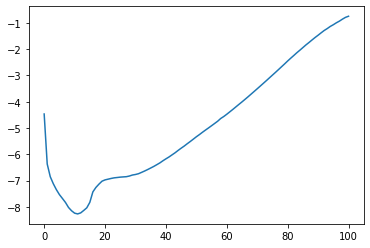

In [7]:
sns.lineplot(np.arange(N), a_x)

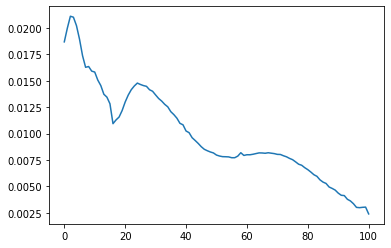

In [8]:
sns.lineplot(np.arange(N), b_x)

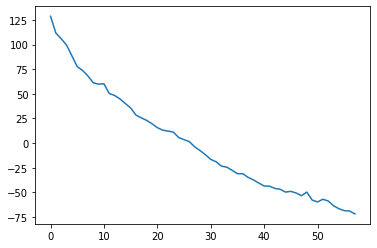

In [9]:
sns.lineplot(np.arange(T), k_t)

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.ar_model import AutoReg

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8a14a77160>,
 (-4.057606471558952,
  0.0011371592471528184,
  4,
  52,
  {'1%': -3.562878534649522,
   '5%': -2.918973284023669,
   '10%': -2.597393446745562},
  195.22046198330523))

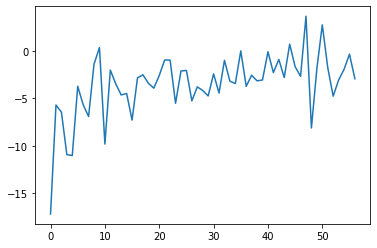

In [11]:
k_t_ADF = ADF(np.diff(k_t))
sns.lineplot(np.arange(len(np.diff(k_t))),np.diff(k_t)),k_t_ADF

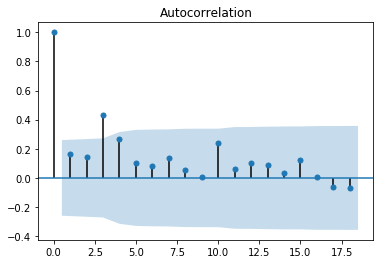

In [12]:
acf = sm.graphics.tsa.plot_acf(np.diff(k_t))

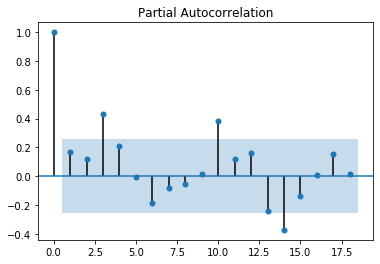

In [13]:
pacf = sm.graphics.tsa.plot_pacf(np.diff(k_t))

In [14]:
trend_evaluate = sm.tsa.arma_order_select_ic(np.diff(k_t), ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/chen/work/venv/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'avail

In [15]:
trend_evaluate

{'aic':             0           1           2           3           4
 0         NaN  327.483805  327.827910  311.603212  302.353328
 1  316.022984  294.817846  288.799962  285.985888  279.011585
 2  310.222214  320.104716  302.803905  285.956676  284.118865
 3  289.654329  286.618495  279.601517  281.548556  285.575457
 4  286.026789  287.680463  281.585115  282.760854  284.328121,
 'bic':             0           1           2           3           4
 0         NaN  331.569908  333.957064  319.775417  312.568584
 1  320.109087  300.947000  296.972167  296.201145  291.269892
 2  316.351368  328.276921  313.019162  298.214983  298.420224
 3  297.826534  296.833751  291.859825  295.849915  301.919867
 4  296.242046  299.938770  295.886474  299.105264  302.715582,
 'aic_min_order': (1, 4),
 'bic_min_order': (1, 4)}

In [16]:
model = ARIMA(k_t, order=(1,1,4))

In [17]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   57
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -132.253
Method:                       css-mle   S.D. of innovations              2.310
Date:                Mon, 07 Jun 2021   AIC                            278.506
Time:                        00:26:44   BIC                            292.808
Sample:                             1   HQIC                           284.064
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0182      1.460     -2.751      0.006      -6.881      -1.156
ar.L1.D.y      0.9001      0.176      5.101      0.000       0.554       1.246
ma.L1.D.y     -1.1371      0.286     -3.977      0.000      -1.697      -0.577
ma.L2.D.y      0.3386      0.209      1.618      0.106      -0.072       0.749
ma.L3.D.y      0.7537      0.189      3.994      0.000       0.384       1.124
ma.L4.D.y     -0.4719      0.321     -1.471      0.141      -1.100       0.157
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1110           +0.0000j            1.1110            0.0000
MA.1           -1.3078           -0.0000j            1.3078           -0.5000
MA.2            0.6423           -0.7665j            1.0001           -0.1390
MA.3            0.6423           +0.7665j            1.0001            0.1390
MA.4            1.6203           -0.0000j            1.6203           -0.0000
-----------------------------------------------------------------------------
"""

In [27]:
age = 70
steps = max(df_test["Year"]) - max(year)
df_test[df_test["Age"]==age]

,Year,Age,Female,Male,Total
6508,2005,70,0.008949,0.021762,0.014931
6619,2006,70,0.008479,0.019631,0.013702
6730,2007,70,0.008529,0.020085,0.01395
6841,2008,70,0.008174,0.019539,0.013507
6952,2009,70,0.007723,0.018255,0.012676
7063,2010,70,0.007732,0.018529,0.012821
7174,2011,70,0.008129,0.018932,0.013224
7285,2012,70,0.007548,0.018338,0.012637
7396,2013,70,0.00735,0.018089,0.012412
7507,2014,70,0.007353,0.017882,0.012315


In [28]:
a_x

array([-4.4677121 , -6.36697889, -6.84960011, -7.11677452, -7.34009054,
       -7.52860678, -7.67723321, -7.82844821, -8.01882093, -8.14401411,
       -8.23517745, -8.26407675, -8.22510144, -8.13194424, -8.03270215,
       -7.82401007, -7.42770819, -7.25806758, -7.13227708, -7.02087519,
       -6.97139243, -6.9441022 , -6.91628122, -6.89350503, -6.88053929,
       -6.86671686, -6.85764272, -6.8496616 , -6.82452757, -6.78664664,
       -6.76612274, -6.73631383, -6.68591749, -6.63431488, -6.57857899,
       -6.51978611, -6.46036715, -6.39413619, -6.3266229 , -6.24616879,
       -6.17188872, -6.10138424, -6.02133084, -5.94194407, -5.85260127,
       -5.7677052 , -5.68722619, -5.59791604, -5.51289086, -5.4234569 ,
       -5.33311542, -5.25070525, -5.16275436, -5.07888823, -4.99696777,
       -4.9128152 , -4.82811342, -4.74271412, -4.63871441, -4.56381933,
       -4.476821  , -4.38502592, -4.29224262, -4.19653632, -4.10107996,
       -4.00761401, -3.91033855, -3.81272178, -3.71134534, -3.61

In [29]:
age_train = np.exp(a_x[age] + b_x[age]*k_t)
forecast = model_fit.forecast(steps = int(steps))
age_predict = np.exp(a_x[age] + b_x[age]*forecast[0])
age_top, age_bot = np.exp(a_x[age] + b_x[age]*forecast[2][:,0]),np.exp(a_x[age] + b_x[age]*forecast[2][:,1])

In [30]:
forecast

(array([ -77.15396619,  -79.19446513,  -81.07306078,  -83.92619896,
         -86.8957039 ,  -89.96995326,  -93.1384855 ,  -96.39188393,
         -99.72167238, -103.12022126, -106.58066299, -110.09681591,
        -113.66311575, -117.274554  , -120.92662238]),
 array([ 2.31008691,  2.90582356,  3.5574177 ,  5.39328779,  7.19684889,
         9.00086801, 10.80747329, 12.6120943 , 14.40900857, 16.19290239,
        17.95928928, 19.70455759, 21.42589594, 23.12118474, 24.78888621]),
 array([[ -81.68165333,  -72.62627906],
        [ -84.88977466,  -73.49915561],
        [ -88.04547135,  -74.10065021],
        [ -94.49684879,  -73.35554912],
        [-101.00126853,  -72.79013927],
        [-107.61133039,  -72.32857613],
        [-114.32074392,  -71.95622708],
        [-121.11113452,  -71.67263333],
        [-127.96281023,  -71.48053453],
        [-134.85772675,  -71.38271577],
        [-141.78022316,  -71.38110282],
        [-148.71703911,  -71.4765927 ],
        [-155.65710014,  -71.66913136],


Text(0, 0.5, 'Death Rate')

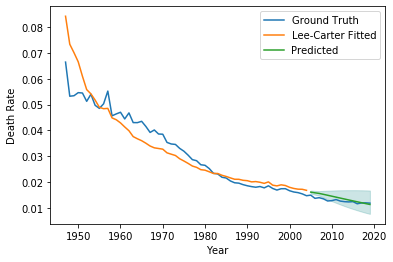

In [31]:
sns.lineplot(np.arange(min(year),max(df_test["Year"])+1),np.concatenate([rate[:,age],df_test[df_test["Age"]==age].Total.to_numpy(dtype="float")]), label="Ground Truth")
sns.lineplot(np.arange(min(year),max(year)+1),age_train, label="Lee-Carter Fitted")
sns.lineplot(np.arange(min(df_test["Year"]),max(df_test["Year"])+1), age_predict, label="Predicted")
plt.fill_between(np.arange(min(df_test["Year"]),max(df_test["Year"])+1), age_top, age_bot, color=(0,0.5,0.5,0.2), label="Confidence")
plt.xlabel("Year")
plt.ylabel("Death Rate")

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = mean_squared_error(age_predict, df_test[df_test["Age"]==age].Total.to_numpy(dtype="float"), squared=False)
mae = mean_absolute_error(age_predict, df_test[df_test["Age"]==age].Total.to_numpy(dtype="float"))

rmse, mae

(0.0012759828526324824, 0.0010974114774297053)